# Model Development

### Objectives

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/Yaswanth/Desktop/DSNB/DataSets/clean_laptops_df.csv", header=0, index_col=0)
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,1,0


# Task 1 : Single Linear Regression

Creating a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [7]:
X = df[["CPU_frequency"]]
Y = df["Price"]
lm = LinearRegression()
lm.fit(X, Y)
Yhat = lm.predict(X)
Yhat[0:10]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057, 1073.07834392, 1073.07834392, 1073.07834392,
       1534.00050386, 1175.50549057])

Generating the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\1028716797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\1028716797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



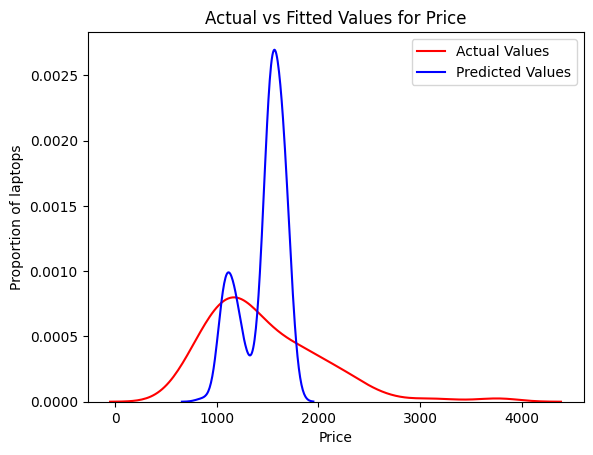

In [8]:
ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [9]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [10]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1 = LinearRegression()
lm1.fit(Z, df["Price"])
Y_hat = lm1.predict(Z)
Y_hat[0:10]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022, 1056.42067418, 1252.02084839,  806.98504446,
       1007.51446753, 1449.64309091])

Plotting the Distribution graph of the predicted values as well as the Actual values

C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\2816218257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\2816218257.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



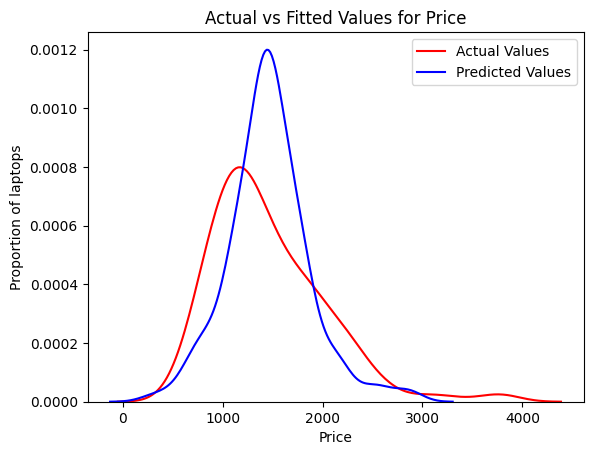

In [12]:
ax2 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values", ax = ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

Finding the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [14]:
mse_mlr = mean_squared_error(df['Price'], Y_hat)
r2_score_mlr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_mlr)
print('The mean square error of price and predicted value is: ', mse_mlr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  161680.57263893104


<b> MLR is the best fit for our data than the SLR </b>

# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`.

In [15]:
X = X.to_numpy().flatten()
X

array([0.55172414, 0.68965517, 0.93103448, 0.55172414, 0.62068966,
       0.55172414, 0.55172414, 0.55172414, 0.86206897, 0.62068966,
       0.62068966, 0.68965517, 0.68965517, 0.55172414, 0.55172414,
       0.86206897, 0.62068966, 0.62068966, 0.55172414, 0.55172414,
       0.62068966, 0.86206897, 0.62068966, 0.86206897, 0.93103448,
       0.68965517, 0.82758621, 0.93103448, 0.93103448, 0.86206897,
       0.93103448, 0.93103448, 0.55172414, 0.62068966, 0.55172414,
       0.62068966, 0.93103448, 0.62068966, 0.86206897, 0.55172414,
       0.62068966, 0.93103448, 0.55172414, 0.55172414, 0.55172414,
       0.96551724, 0.55172414, 0.86206897, 0.55172414, 0.55172414,
       0.4137931 , 0.62068966, 0.62068966, 0.62068966, 0.62068966,
       0.55172414, 0.55172414, 0.86206897, 0.93103448, 0.86206897,
       0.86206897, 0.93103448, 0.86206897, 0.86206897, 1.        ,
       0.93103448, 0.55172414, 0.62068966, 0.62068966, 0.86206897,
       0.86206897, 0.62068966, 0.93103448, 0.86206897, 0.96551

In [16]:
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

Plotting the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

In [18]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

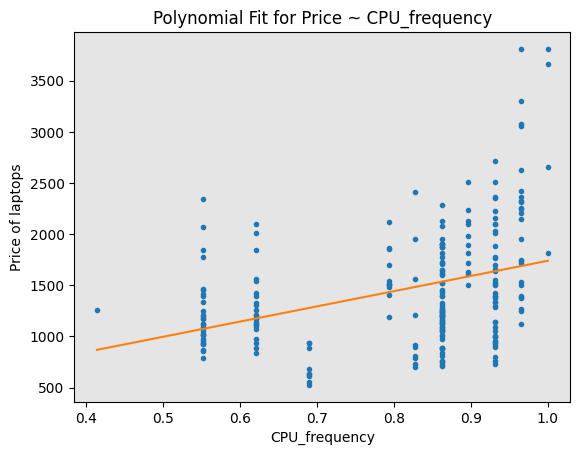

In [19]:
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

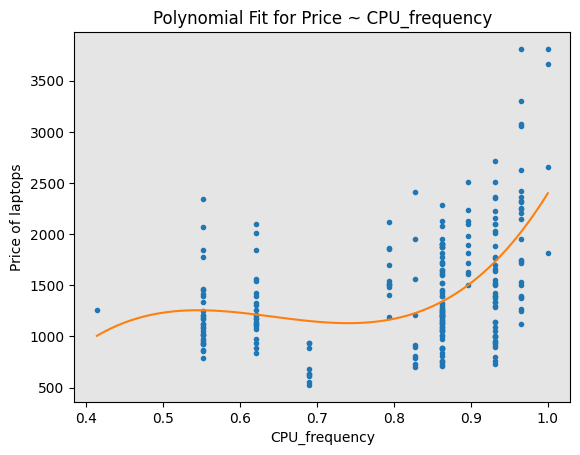

In [20]:
# Call for function of degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

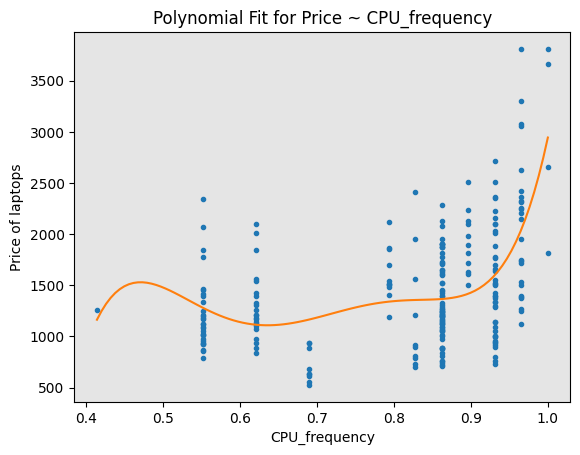

In [21]:
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.

In [22]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653114
The MSE value for 3rd degree polynomial is:  241024.86303848762
The R-square value for 5th degree polynomial is:  0.3030822706443952
The MSE value for 5th degree polynomial is:  229137.29548053336


# Task 4 - Pipeline
Creating a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 

In [24]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

Evaluate the MSE and R^2 values for the this predicted output.

In [27]:
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))

R^2 for multi-variable polynomial pipeline is:  0.6329440949749154
MSE for multi-variable polynomial pipeline is:  120683.10766806723


We should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.